In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../../project_data/washington_timestamp_data.csv") 

In [3]:
df.shape

(1370980, 33)

In [4]:
df.head()

Unnamed: 0         ID  Severity           Start_Time             End_Time  \
0           0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1           5  A-2716605         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
2           6  A-2716606         2  2016-02-08 08:16:57  2016-02-08 14:16:57   
3           7  A-2716607         2  2016-02-08 08:16:57  2016-02-08 14:16:57   
4           8  A-2716608         2  2016-02-08 08:15:41  2016-02-08 14:15:41   

   Start_Lat  Start_Lng    End_Lat    End_Lng  Distance(mi)  ... Station  \
0  40.108910 -83.092860  40.112060 -83.031870         3.230  ...   False   
1  39.172393 -84.492792  39.170476 -84.501798         0.500  ...   False   
2  39.063240 -84.032430  39.067310 -84.058510         1.427  ...   False   
3  39.067080 -84.058550  39.063020 -84.032540         1.423  ...   False   
4  39.775650 -84.186030  39.772750 -84.188050         0.227  ...   False   

    Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  Sunrise_Sunset  \
0  False            False           False         False           False   
1  False            False           False         False            True   
2  False            False            True         False            True   
3  False            False           False         False            True   
4  False            False           False         False            True   

   Civil_Twilight  Nautical_Twilight  Astronomical_Twilight   Sign  
0           False              False                  False  False  
1            True               True                   True  False  
2            True               True                   True   True  
3            True               True                   True  False  
4            True               True                   True  False  

[5 rows x 33 columns]

In [5]:
df = df.drop('Unnamed: 0',axis = 1)

In [6]:
#converted 'Start_Time' to datetime64
df['Start_Time']= pd.to_datetime(df['Start_Time'])

#converted 'End_Time' to datetime64
df['End_Time']= pd.to_datetime(df['End_Time'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370980 entries, 0 to 1370979
Data columns (total 32 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1370980 non-null  object        
 1   Severity               1370980 non-null  int64         
 2   Start_Time             1370980 non-null  datetime64[ns]
 3   End_Time               1370980 non-null  datetime64[ns]
 4   Start_Lat              1370980 non-null  float64       
 5   Start_Lng              1370980 non-null  float64       
 6   End_Lat                1370980 non-null  float64       
 7   End_Lng                1370980 non-null  float64       
 8   Distance(mi)           1370980 non-null  float64       
 9   State                  1370980 non-null  object        
 10  Humidity(%)            1370980 non-null  float64       
 11  Pressure(in)           1370980 non-null  float64       
 12  Visibility(mi)         13709

In [8]:
df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'OK', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'NC',
       'SC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [9]:
#subsetting the dataframe with only data with state = washington(WA)
df_wa = df.loc[df['State'] == 'WA']
df_wa.head()

ID  Severity          Start_Time            End_Time  Start_Lat  \
91570  A-2827580         2 2016-11-30 12:49:30 2016-11-30 18:49:30  47.016805   
91578  A-2827590         2 2016-11-30 14:00:35 2016-11-30 20:00:35  47.332115   
91595  A-2827612         3 2016-11-30 14:52:55 2016-11-30 20:52:55  47.884150   
91617  A-2827637         2 2016-11-30 15:25:58 2016-11-30 21:25:58  48.188130   
91661  A-2827688         3 2016-11-30 16:48:47 2016-11-30 22:48:47  47.599430   

        Start_Lng    End_Lat     End_Lng  Distance(mi) State  ...  Station  \
91570 -122.905991  47.014850 -122.906040         0.135    WA  ...    False   
91578 -123.906520  47.332071 -123.906524         0.003    WA  ...    False   
91595 -122.231190  47.877440 -122.239700         0.609    WA  ...    False   
91617 -122.195055  48.188227 -122.192777         0.105    WA  ...    False   
91661 -122.180330  47.605310 -122.185770         0.479    WA  ...    False   

        Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  Sunrise_Sunset  \
91570  False            False           False         False            True   
91578  False            False           False         False            True   
91595  False            False           False         False            True   
91617   True            False           False         False            True   
91661  False            False           False         False           False   

       Civil_Twilight  Nautical_Twilight  Astronomical_Twilight   Sign  
91570            True               True                   True  False  
91578            True               True                   True  False  
91595            True               True                   True  False  
91617            True               True                   True   True  
91661            True               True                   True  False  

[5 rows x 32 columns]

In [10]:
df_wa.shape

(19974, 32)

In [11]:
df_wa_sign = df_wa[df_wa["Sign"]==True]
df_wa_sign.shape

(5299, 32)

In [12]:
#subsetting 25 rows from the dataframe that will be used to collect images from google maps streetview
df_google_image = df_wa_sign.iloc[:25, :]
df_google_image.head(26)

ID  Severity          Start_Time            End_Time  Start_Lat  \
91617  A-2827637         2 2016-11-30 15:25:58 2016-11-30 21:25:58  48.188130   
91675  A-2827704         3 2016-11-30 17:10:47 2016-11-30 23:10:47  47.573921   
91720  A-2827768         2 2016-11-30 18:53:04 2016-12-01 00:53:04  47.637790   
91742  A-2827812         2 2016-12-01 06:18:26 2016-12-01 12:18:26  47.472142   
91780  A-2827885         2 2016-12-01 10:24:26 2016-12-01 16:24:26  47.269190   
91902  A-2828052         3 2016-12-01 17:55:27 2016-12-01 23:55:27  48.079390   
92017  A-2828231         2 2016-12-02 09:44:46 2016-12-02 15:44:46  47.408204   
92097  A-2828314         2 2016-12-02 15:11:06 2016-12-02 21:11:06  47.664940   
92098  A-2828315         2 2016-12-02 15:11:06 2016-12-02 21:11:06  47.664920   
92245  A-2828479         3 2016-12-02 19:59:46 2016-12-03 01:59:46  47.487850   
92262  A-2828518         2 2016-12-03 19:26:45 2016-12-04 01:26:45  47.714610   
92270  A-2828530         3 2016-12-04 10:55:57 2016-12-04 16:55:57  47.534170   
92294  A-2828585         2 2016-12-05 07:16:46 2016-12-05 13:16:46  47.318370   
92307  A-2828601         2 2016-12-05 08:57:47 2016-12-05 14:57:47  47.507240   
92316  A-2828612         3 2016-12-05 10:44:44 2016-12-05 16:44:44  47.694905   
92317  A-2828613         3 2016-12-05 10:44:44 2016-12-05 16:44:44  47.693478   
92322  A-2828622         3 2016-12-05 11:36:57 2016-12-05 17:36:57  47.599240   
92324  A-2828624         3 2016-12-05 11:36:57 2016-12-05 17:36:57  47.599240   
92415  A-2828757         2 2016-12-05 19:59:45 2016-12-06 01:59:45  47.926460   
92458  A-2828834         2 2016-12-06 11:05:12 2016-12-06 17:05:12  48.006603   
92475  A-2828854         2 2016-12-06 12:54:48 2016-12-06 18:54:48  48.007264   
92478  A-2828857         2 2016-12-06 12:54:48 2016-12-06 18:54:48  48.007440   
92589  A-2828996         2 2016-12-07 06:54:16 2016-12-07 12:54:16  47.543170   
92596  A-2829014         2 2016-12-07 08:29:45 2016-12-07 14:29:45  47.222101   
92610  A-2829033         2 2016-12-07 11:30:54 2016-12-07 17:30:54  47.468960   

        Start_Lng    End_Lat     End_Lng  Distance(mi) State  ...  Station  \
91617 -122.195055  48.188227 -122.192777         0.105    WA  ...    False   
91675 -122.339510  47.567360 -122.339460         0.453    WA  ...    False   
91720 -122.193540  47.641740 -122.199308         0.383    WA  ...    False   
91742 -122.269086  47.471470 -122.268910         0.047    WA  ...    False   
91780 -122.260660  47.272461 -122.259294         0.235    WA  ...    False   
91902 -122.184970  48.071690 -122.184940         0.532    WA  ...    False   
92017 -122.038119  47.408807 -122.038334         0.043    WA  ...     True   
92097 -122.316323  47.664920 -122.314742         0.074    WA  ...     True   
92098 -122.314742  47.664940 -122.316323         0.074    WA  ...    False   
92245 -122.278970  47.485670 -122.275720         0.214    WA  ...    False   
92262 -122.185500  47.714610 -122.185500         0.000    WA  ...     True   
92270 -122.332170  47.533178 -122.331308         0.079    WA  ...    False   
92294 -122.244820  47.322380 -122.244790         0.277    WA  ...    False   
92307 -121.890000  47.508077 -121.885157         0.233    WA  ...    False   
92316 -122.344580  47.693478 -122.344570         0.099    WA  ...     True   
92317 -122.344570  47.694905 -122.344580         0.099    WA  ...    False   
92322 -122.314159  47.599240 -122.314120         0.002    WA  ...    False   
92324 -122.314120  47.599240 -122.314159         0.002    WA  ...    False   
92415 -122.203240  47.911810 -122.209900         1.058    WA  ...    False   
92458 -122.485721  48.006646 -122.485084         0.030    WA  ...     True   
92475 -122.465005  48.007440 -122.465460         0.024    WA  ...    False   
92478 -122.465460  48.007264 -122.465005         0.024    WA  ...    False   
92589 -122.334039  47.545480 -122.333800         0.160    WA  ...    False   
92596 -122.463360  47.225010 -122.4

In [13]:
# df_google_image.to_csv('../data/Washington_state_data_for_google_images.csv')

In [14]:
percent_df = df['Severity'].value_counts()/df.shape[0]*100
percent_df

2    80.659893
3    10.303287
4     7.025558
1     2.011262
Name: Severity, dtype: float64

In [15]:
percent_df_wa = df_wa['Severity'].value_counts()/df_wa.shape[0]*100
percent_df_wa

2    66.186042
3    18.609192
4    12.731551
1     2.473215
Name: Severity, dtype: float64

In [16]:
percent_df_wa_sign = df_wa_sign['Severity'].value_counts()/df_wa_sign.shape[0]*100
percent_df_wa_sign

2    59.916965
3    18.852614
4    16.361578
1     4.868843
Name: Severity, dtype: float64

### EDA on Accidents that occured in Washington State

#### 1. Comparing Severity in Washtington to rest of US

In [17]:
compare_per = pd.DataFrame({'all_stat e_data':percent_df,'wa_state_data':percent_df_wa,'wa_state_data_sign_present':percent_df_wa_sign})

In [18]:
compare_per

all_state_data  wa_state_data  wa_state_data_sign_present
2       80.659893      66.186042                   59.916965
3       10.303287      18.609192                   18.852614
4        7.025558      12.731551                   16.361578
1        2.011262       2.473215                    4.868843

<AxesSubplot:>

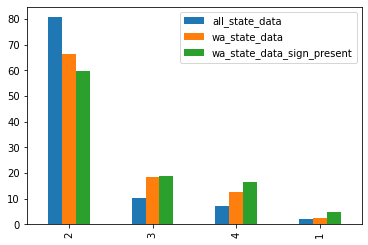

In [19]:
compare_per.plot(kind='bar')

In [35]:
compare_per['change_due_to_sign'] = (compare_per['wa_state_data_sign_present'] - compare_per['wa_state_data'])/ compare_per['wa_state_data']*100
compare_per['change_due_to_sign']

2    -9.471901
3     1.308073
4    28.512054
1    96.862902
Name: change_due_to_sign, dtype: float64

Note: We see that mild severity (class 1) accidents nearly double when signage is present. Also the class 4 accidents go up by 28% this is very concerning. 

In [20]:
df_wa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19974 entries, 91570 to 1370904
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     19974 non-null  object        
 1   Severity               19974 non-null  int64         
 2   Start_Time             19974 non-null  datetime64[ns]
 3   End_Time               19974 non-null  datetime64[ns]
 4   Start_Lat              19974 non-null  float64       
 5   Start_Lng              19974 non-null  float64       
 6   End_Lat                19974 non-null  float64       
 7   End_Lng                19974 non-null  float64       
 8   Distance(mi)           19974 non-null  float64       
 9   State                  19974 non-null  object        
 10  Humidity(%)            19974 non-null  float64       
 11  Pressure(in)           19974 non-null  float64       
 12  Visibility(mi)         19974 non-null  float64       


In [22]:
geo_column_list = ['Start_Lat','End_Lat','Start_Lng','End_Lng']
weather_distance_column_list = ['Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']
road_sign_column_list = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']

In [23]:
print(len(geo_column_list))
print(len(weather_distance_column_list))
print(len(road_sign_column_list))

4
5
13


#### 2. Descriptive statistics

In [32]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  1.370980e+06  1.370980e+06  1.370980e+06  1.370980e+06  1.370980e+06   
mean   2.223431e+00  3.687072e+01 -9.858667e+01  3.687078e+01 -9.858647e+01   
std    5.951861e-01  5.202776e+00  1.846727e+01  5.202751e+00  1.846714e+01   
min    1.000000e+00  2.457022e+01 -1.244976e+02  2.457011e+01 -1.244978e+02   
25%    2.000000e+00  3.383234e+01 -1.182171e+02  3.383233e+01 -1.182171e+02   
50%    2.000000e+00  3.732941e+01 -9.409633e+01  3.732943e+01 -9.409387e+01   
75%    2.000000e+00  4.073800e+01 -8.092084e+01  4.073834e+01 -8.092127e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)   Humidity(%)  Pressure(in)  Visibility(mi)  \
count  1.370980e+06  1.370980e+06  1.370980e+06    1.370980e+06   
mean   5.744937e-01  6.420014e+01  2.952813e+01    9.145091e+00   
std    1.612182e+00  2.322987e+01  1.030335e+00    2.795097e+00   
min    0.000000e+00  1.000000e+00  2.000000e-02    0.000000e+00   
25%    0.000000e+00  4.800000e+01  2.940000e+01    1.000000e+01   
50%    1.620000e-01  6.700000e+01  2.986000e+01    1.000000e+01   
75%    5.850000e-01  8.400000e+01  3.003000e+01    1.000000e+01   
max    1.551860e+02  1.000000e+02  5.804000e+01    1.110000e+02   

       Wind_Speed(mph)  
count     1.370980e+06  
mean      7.631396e+00  
std       5.600232e+00  
min       0.000000e+00  
25%       4.600000e+00  
50%       7.000000e+00  
75%       1.040000e+01  
max       9.840000e+02

In [30]:
df_wa.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  19974.000000  19974.000000  19974.000000  19974.000000  19974.000000   
mean       2.415991     47.469850   -122.203183     47.469600   -122.203115   
std        0.739639      0.550247      0.898580      0.551346      0.898481   
min        1.000000     45.559729   -124.413860     45.559810   -124.413860   
25%        2.000000     47.288208   -122.406840     47.284680   -122.406840   
50%        2.000000     47.571590   -122.316277     47.571465   -122.316660   
75%        3.000000     47.694950   -122.210867     47.694894   -122.209440   
max        4.000000     49.000560   -117.041850     49.002140   -117.041230   

       Distance(mi)   Humidity(%)  Pressure(in)  Visibility(mi)  \
count  19974.000000  19974.000000  19974.000000    19974.000000   
mean       0.458972     72.653900     29.894291        9.115981   
std        1.331054     19.496933      0.388692        2.205100   
min        0.000000      8.000000     27.120000        0.000000   
25%        0.017000     59.000000     29.740000       10.000000   
50%        0.172000     76.000000     29.970000       10.000000   
75%        0.523000     89.000000     30.120000       10.000000   
max       61.085000    100.000000     30.790000       10.000000   

       Wind_Speed(mph)  
count     19974.000000  
mean          7.236197  
std           4.450400  
min           0.000000  
25%           4.600000  
50%           6.900000  
75%           9.200000  
max          38.000000

In [31]:
df_wa_sign.describe()

Severity    Start_Lat    Start_Lng      End_Lat      End_Lng  \
count  5299.000000  5299.000000  5299.000000  5299.000000  5299.000000   
mean      2.467069    47.561330  -122.201645    47.561559  -122.201484   
std       0.820763     0.479832     0.809808     0.480152     0.810003   
min       1.000000    45.579530  -124.044880    45.579189  -124.046680   
25%       2.000000    47.466555  -122.347630    47.466815  -122.347600   
50%       2.000000    47.605830  -122.320760    47.605669  -122.321100   
75%       3.000000    47.711426  -122.245230    47.711395  -122.243860   
max       4.000000    48.994000  -117.115900    49.000760  -117.042290   

       Distance(mi)  Humidity(%)  Pressure(in)  Visibility(mi)  \
count   5299.000000  5299.000000   5299.000000     5299.000000   
mean       0.318002    70.642008     29.905612        9.227613   
std        0.676507    19.477518      0.376562        2.069155   
min        0.000000     8.000000     27.120000        0.000000   
25%        0.000000    56.000000     29.750000       10.000000   
50%        0.085000    74.000000     29.990000       10.000000   
75%        0.384000    86.000000     30.120000       10.000000   
max       11.420000   100.000000     30.680000       10.000000   

       Wind_Speed(mph)  
count      5299.000000  
mean          7.103718  
std           4.398859  
min           0.000000  
25%           4.600000  
50%           6.900000  
75%           9.200000  
max          38.000000

Looking at the descriptive statistics for all the states vs washington so of the key points that stand out.
- Washington has very high Humidity% as compared to all US average.
- The mean distance over which the accident occurs is much lower in Washington. However, the severity is on average slightly higher for the state.

Looking at data for washington vs cases where a sign was present we see that
- When sign was present the average severity is higher. This is corroborated by analysis in previous section where we see that when signage is present class 2 severity reduces and class 3,4 and  class 1 increase their probability. Particularly class 4 and class 1.  This also corresponds to higher std deviation among in accident severity when a sign is present.
- We can postulate that when a sign was present and missed the accident sevrity tends to be very severe or mild. A deep learning Traffic sign reconition model can be useful in preventing some accidents. 

#### 3. Boxplots for Washington

In [36]:
# Boxplots for geo co-ordinates

Text(0.5, 1.0, 'Boxplot of Latititudes for the accidents where some signage was present')

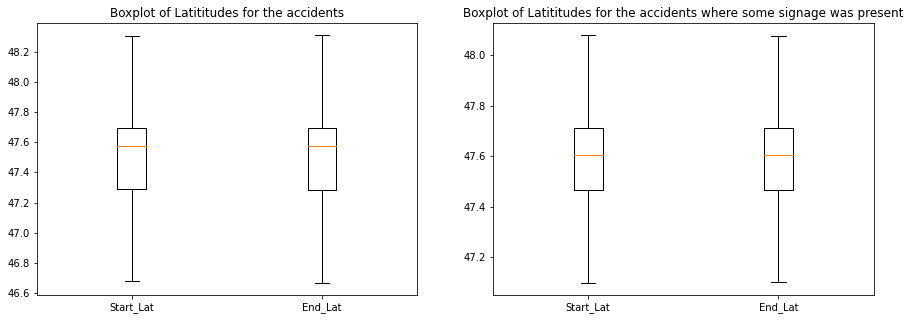

In [37]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
ax[0].boxplot(df_wa[['Start_Lat','End_Lat']], labels=df_wa[['Start_Lat','End_Lat']].columns, showfliers=False)
ax[0].set_title("Boxplot of Latititudes for the accidents")
ax[1].boxplot(df_wa_sign[['Start_Lat','End_Lat']], labels=df_wa_sign[['Start_Lat','End_Lat']].columns, showfliers=False)
ax[1].set_title("Boxplot of Latititudes for the accidents where some signage was present")

Text(0.5, 1.0, 'Boxplot of longitudes for the accidents where some signage was present')

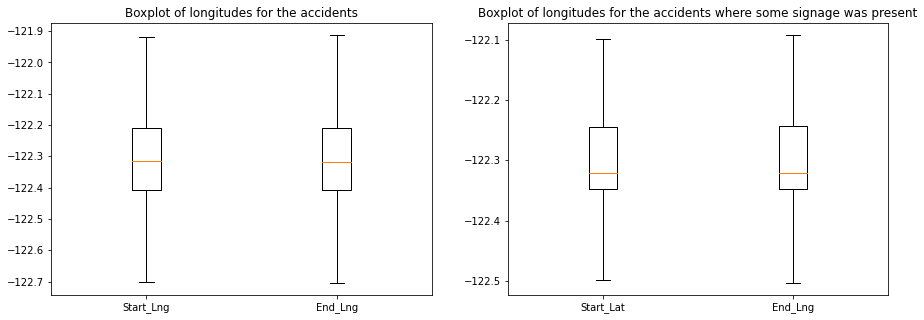

In [38]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
ax[0].boxplot(df_wa[['Start_Lng','End_Lng']], labels=df_wa[['Start_Lng','End_Lng']].columns, showfliers=False)
ax[0].set_title("Boxplot of longitudes for the accidents")
ax[1].boxplot(df_wa_sign[['Start_Lng','End_Lng']], labels=df_wa_sign[['Start_Lat','End_Lng']].columns, showfliers=False)
ax[1].set_title("Boxplot of longitudes for the accidents where some signage was present")

array([<AxesSubplot:title={'center':'Start_Lat'}, xlabel='Severity'>,
       <AxesSubplot:title={'center':'End_Lat'}, xlabel='Severity'>],
      dtype=object)

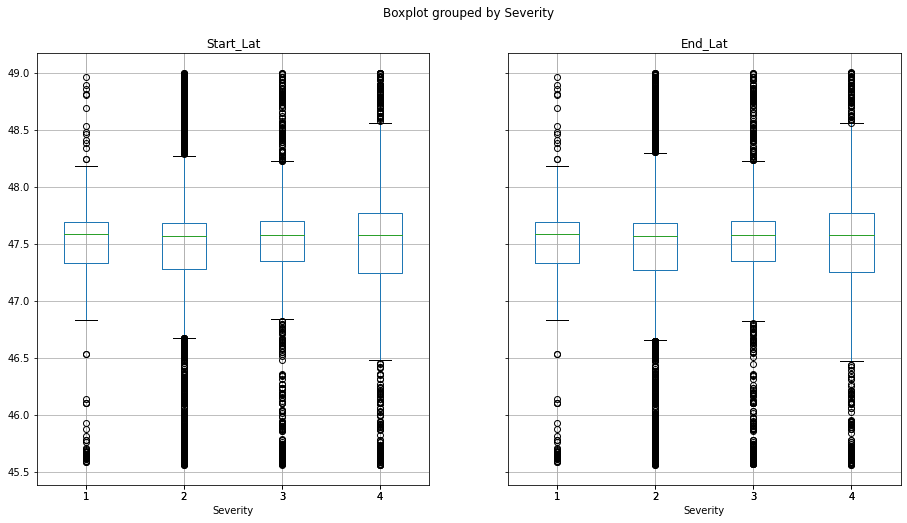

In [39]:
df_wa.boxplot(column= ['Start_Lat','End_Lat'],by='Severity', figsize=(15,8))

array([<AxesSubplot:title={'center':'Start_Lat'}, xlabel='Severity'>,
       <AxesSubplot:title={'center':'End_Lat'}, xlabel='Severity'>],
      dtype=object)

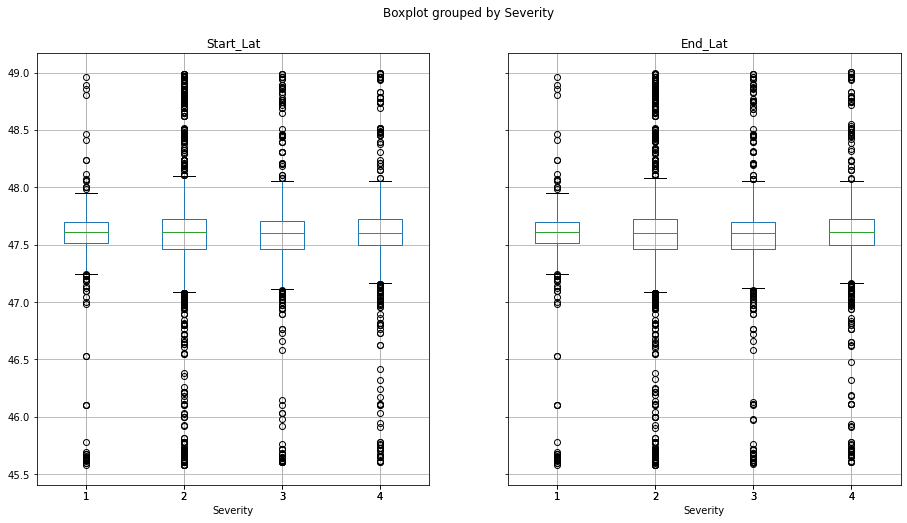

In [40]:
df_wa_sign.boxplot(column= ['Start_Lat','End_Lat'],by='Severity', figsize=(15,8))

array([<AxesSubplot:title={'center':'Start_Lng'}, xlabel='Severity'>,
       <AxesSubplot:title={'center':'End_Lng'}, xlabel='Severity'>],
      dtype=object)

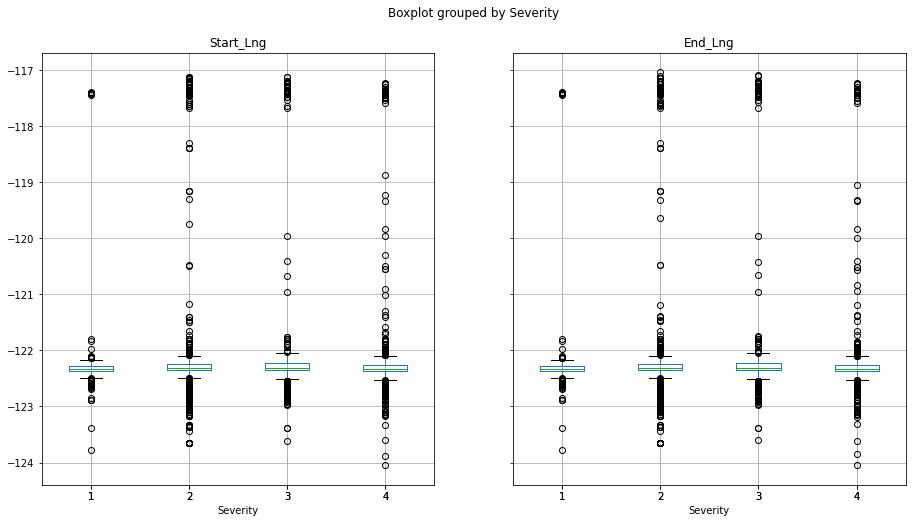

In [41]:
df_wa_sign.boxplot(column= ['Start_Lng','End_Lng'],by='Severity', figsize=(15,8))

In [ ]:
# boxplots for weather data and distance

array([[<AxesSubplot:title={'center':'Distance(mi)'}, xlabel='Severity'>,
        <AxesSubplot:title={'center':'Humidity(%)'}, xlabel='Severity'>],
       [<AxesSubplot:title={'center':'Pressure(in)'}, xlabel='Severity'>,
        <AxesSubplot:title={'center':'Visibility(mi)'}, xlabel='Severity'>],
       [<AxesSubplot:title={'center':'Wind_Speed(mph)'}, xlabel='Severity'>,
        <AxesSubplot:>]], dtype=object)

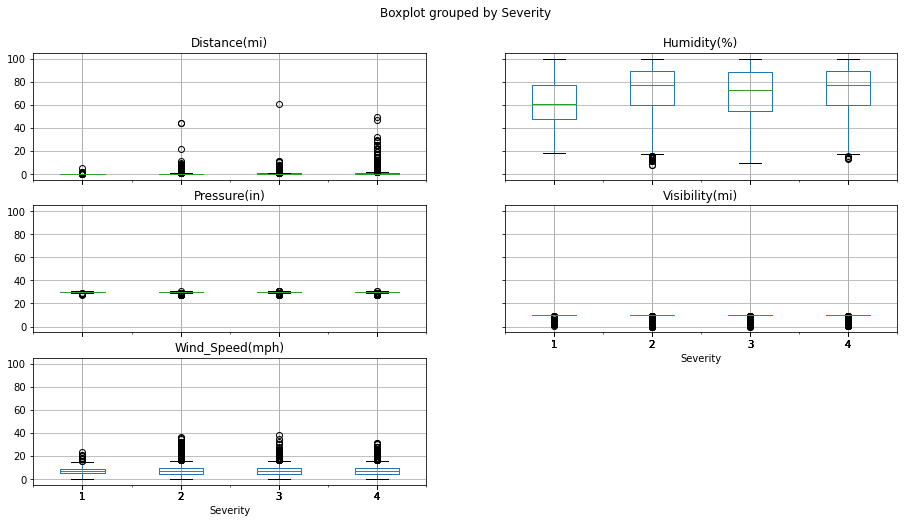

In [47]:
df_wa.boxplot(column= weather_distance_column_list,by='Severity', figsize=(15,8))

#### 4. Histograms

In [58]:
column_list = geo_column_list + weather_distance_column_list
column_list

['Start_Lat',
 'End_Lat',
 'Start_Lng',
 'End_Lng',
 'Distance(mi)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)']

Text(0.5, 1.0, 'Washington Accidents were Sign was present')

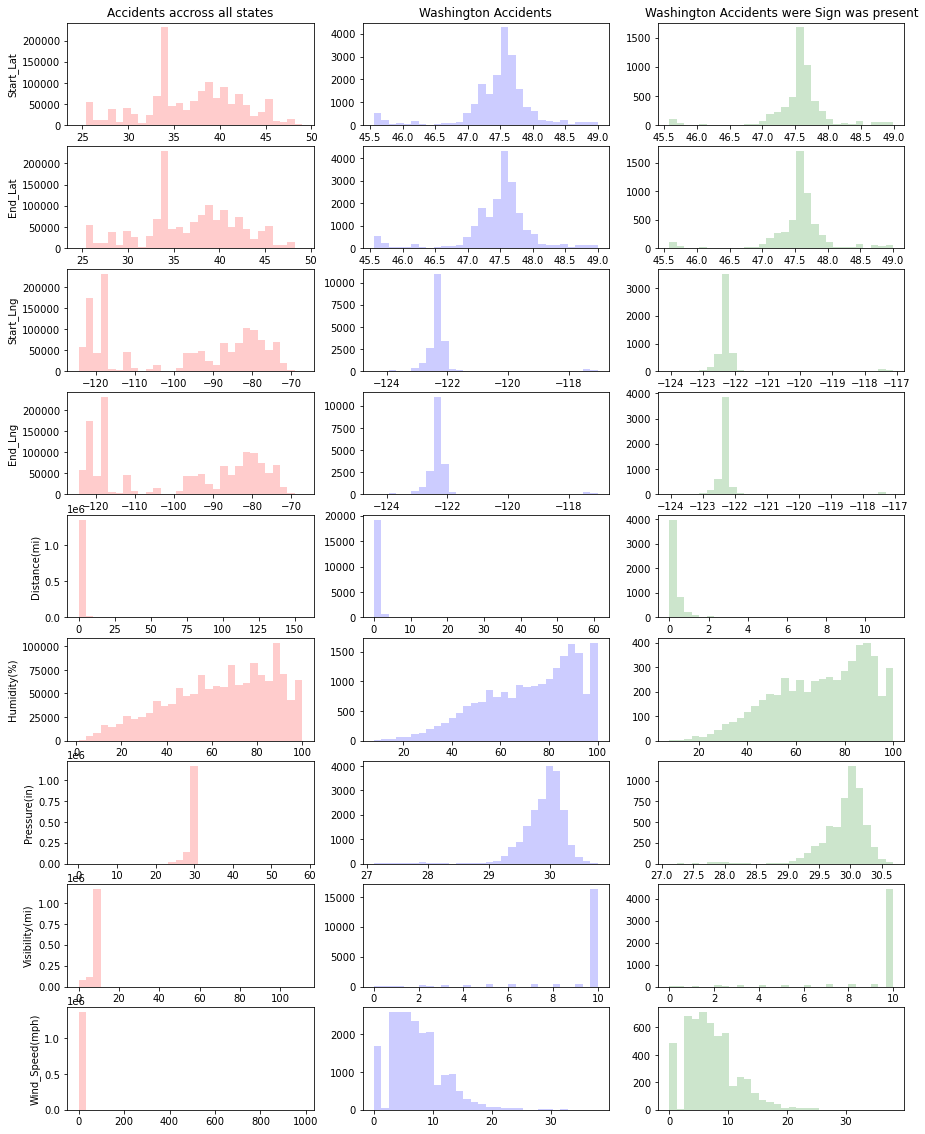

In [68]:
fig, ax = plt.subplots(9,3)
fig.set_size_inches(15,20)


for column,i in zip(column_list,range(0,9)):  
    ax[i][0].hist(df[column],bins=30,color='red',alpha=0.2)
    ax[i][0].set_ylabel(column)
    ax[i][1].hist(df_wa[column],bins=30,color='blue',alpha=0.2)
    ax[i][2].hist(df_wa_sign[column],bins=30,color='green',alpha=0.2)
    
ax[0][0].set_title("Accidents accross all states")
ax[0][1].set_title("Washington Accidents")
ax[0][2].set_title("Washington Accidents were Sign was present")

#
#df_wa_sign.hist()

Notes: 

#### 5. Correlation Coefficent

In [49]:
df_wa_sign.corr()

Severity  Start_Lat  Start_Lng   End_Lat   End_Lng  \
Severity               1.000000   0.020366   0.017313  0.020696  0.016868   
Start_Lat              0.020366   1.000000   0.053131  0.999841  0.052941   
Start_Lng              0.017313   0.053131   1.000000  0.053187  0.999927   
End_Lat                0.020696   0.999841   0.053187  1.000000  0.053008   
End_Lng                0.016868   0.052941   0.999927  0.053008  1.000000   
Distance(mi)           0.177037  -0.047811   0.024232 -0.046486  0.023593   
Humidity(%)            0.040770   0.013056  -0.099673  0.012697 -0.099784   
Pressure(in)           0.007004  -0.034356  -0.491561 -0.034327 -0.491563   
Visibility(mi)        -0.027512  -0.005149  -0.025549 -0.004459 -0.025511   
Wind_Speed(mph)       -0.001600   0.022972  -0.016373  0.023140 -0.016466   
Amenity                0.007182   0.049634  -0.058180  0.049574 -0.058132   
Bump                   0.005788  -0.001383  -0.003412 -0.001394 -0.003458   
Crossing               0.001469   0.036238  -0.033560  0.036263 -0.033487   
Give_Way               0.032283   0.031986  -0.000686  0.032126 -0.000831   
Junction              -0.081152  -0.091023  -0.008245 -0.090470 -0.008265   
No_Exit                0.010993   0.003609  -0.014374  0.003664 -0.014162   
Railway                0.003113  -0.004892  -0.026137 -0.004870 -0.026365   
Roundabout             0.036295   0.056811  -0.004945  0.056765 -0.005074   
Station               -0.004073   0.032482   0.144060  0.031920  0.144194   
Stop                   0.112030   0.038952  -0.023288  0.038791 -0.022953   
Traffic_Calming        0.016424   0.005283  -0.007969  0.004873 -0.008103   
Traffic_Signal         0.000943   0.058233   0.036489  0.057884  0.036384   
Turning_Loop                NaN        NaN        NaN       NaN       NaN   
Sunrise_Sunset        -0.033111  -0.019115   0.026569 -0.018489  0.026674   
Civil_Twilight        -0.025683  -0.024829   0.044721 -0.024420  0.044805   
Nautical_Twilight     -0.017996  -0.005537   0.036617 -0.005351  0.036638   
Astronomical_Twilight  0.013143  -0.044269   0.035807 -0.044006  0.035765   
Sign                        NaN        NaN        NaN       NaN       NaN   

                       Distance(mi)  Humidity(%)  Pressure(in)  \
Severity                   0.177037     0.040770      0.007004   
Start_Lat                 -0.047811     0.013056     -0.034356   
Start_Lng                  0.024232    -0.099673     -0.491561   
End_Lat                   -0.046486     0.012697     -0.034327   
End_Lng                    0.023593    -0.099784     -0.491563   
Distance(mi)               1.000000     0.060452     -0.001043   
Humidity(%)                0.060452     1.000000     -0.051996   
Pressure(in)              -0.001043    -0.051996      1.000000   
Visibility(mi)            -0.081330    -0.347887      0.072150   
Wind_Speed(mph)           -0.031632    -0.092030     -0.100611   
Amenity                   -0.136392    -0.006188      0.088653   
Bump                      -0.008831    -0.030929      0.002174   
Crossing                  -0.175025    -0.055143      0.023406   
Give_Way                  -0.007851    -0.018402     -0.025811   
Junction                   0.251756     0.029467      0.043108   
No_Exit                   -0.009150     0.020900      0.021142   
Railway                   -0.049562    -0.005012      0.055919   
Roundabout                -0.002269    -0.007625      0.002291   
Station                   -0.110746    -0.039071     -0.036368   
Stop                      -0.020259     0.015094     -0.016809   
Traffic_Calming            0.003645    -0.028886      0.018058   
Traffic_Signal            -0.187507    -0.045191     -0.065057   
Turning_Loop                    NaN          NaN           NaN   
Sunrise_Sunset            -0.108916    -0.367677      0.044684   
Civil_Twilight            -0.107988    -0.348950      0.022456   
Nautical_Twilight         -0.120012    -0.334155      0.030819   
Astrono

In [31]:
corr_geo = data_geo.corr()
corr_geo

Start_Lat  Start_Lng   End_Lat   End_Lng
Start_Lat   1.000000   0.103327  0.999646  0.103234
Start_Lng   0.103327   1.000000  0.103948  0.999735
End_Lat     0.999646   0.103948  1.000000  0.103837
End_Lng     0.103234   0.999735  0.103837  1.000000

In [30]:
corr_weather = data_weather.corr()
corr_weather

Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)
Humidity(%)         1.000000     -0.042502       -0.336526        -0.104770
Pressure(in)       -0.042502      1.000000        0.065974        -0.094224
Visibility(mi)     -0.336526      0.065974        1.000000         0.084664
Wind_Speed(mph)    -0.104770     -0.094224        0.084664         1.000000

#### 6. Scatter Plots

In [ ]:
import seaborn as sns
palette = sns.color_palette("bright")

In [81]:
sns_list = column_list + ['Severity']
df_plot =df_wa_sign[sns_list]

(5299, 10)

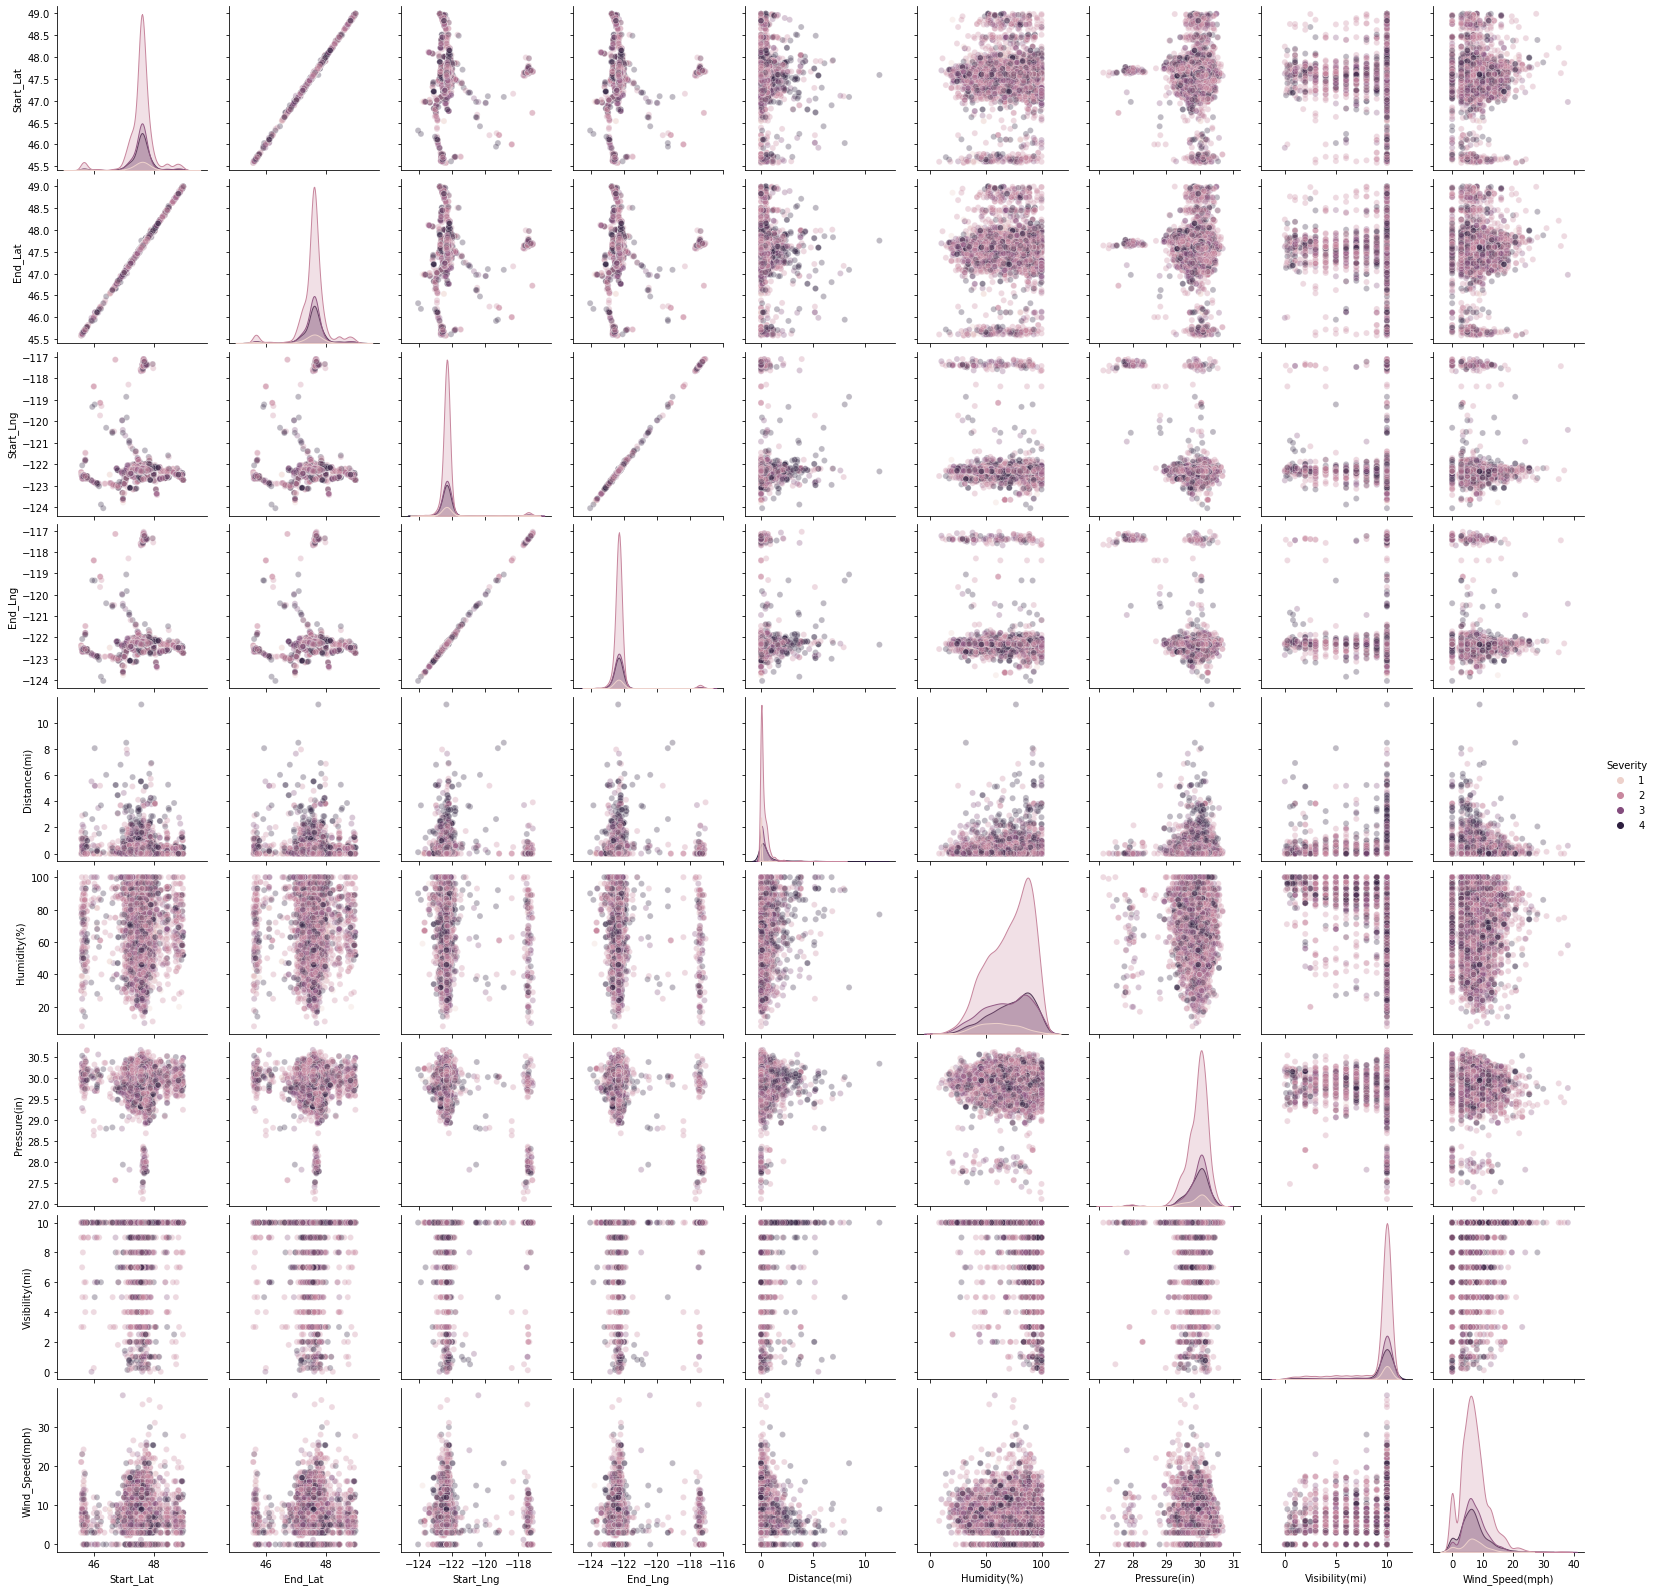

In [82]:
sns.pairplot(df_plot, hue='Severity', plot_kws={'alpha':0.3})

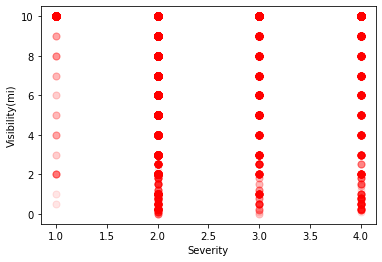

In [74]:
ax=df_wa.plot.scatter(y= "Visibility(mi)", x="Severity", color="red", s=50 , alpha = 0.1)

In [ ]:
# KSHAMA PLEASE ADD SOME MORE SCATTER PLOTS BETWEEN ANY INTERESTING REATIONS .

#### 7. Other plots 

<AxesSubplot:xlabel='Severity'>

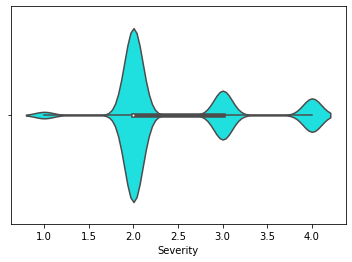

In [48]:
sns.violinplot(x=df_wa["Severity"],color="aqua")

<AxesSubplot:xlabel='Severity'>

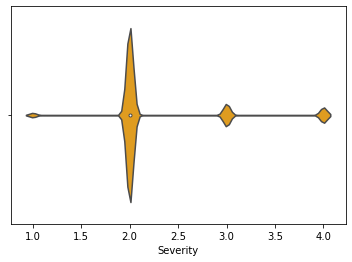

In [51]:
sns.violinplot(x=df["Severity"],color="orange")

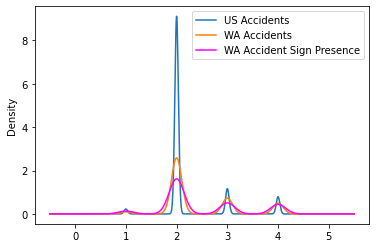

In [84]:
df["Severity"].plot(kind="density", label="US Accidents")
df_wa["Severity"].plot(kind="density", label="WA Accidents")
df_wa_sign["Severity"].plot(kind="density", label = "WA Accident Sign Presence", color ="Magenta")
plt.legend()

#### 8. Geo Visualization

In [85]:
import descartes
import geopandas as gpd
from shapely.geometry  import Point,Polygon
import folium
from mapclassify import classify

In [86]:
geometry = [Point(xy) for xy in zip(df_wa_sign["Start_Lng"],df_wa_sign["Start_Lat"])]
geometry[:3]

In [87]:
geo_df = gpd.GeoDataFrame(df_wa_sign,crs="EPSG:4326", geometry = geometry)

<AxesSubplot:>

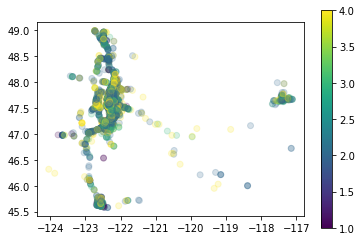

In [88]:
fig, ax = plt.subplots(1,1);
geo_df.plot(alpha = 0.2,ax=ax,legend=True, column = "Severity")

In [91]:
geo_df = geo_df.drop(['Start_Time','End_Time'], axis =1)
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5299 entries, 91617 to 1370859
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     5299 non-null   object  
 1   Severity               5299 non-null   int64   
 2   Start_Lat              5299 non-null   float64 
 3   Start_Lng              5299 non-null   float64 
 4   End_Lat                5299 non-null   float64 
 5   End_Lng                5299 non-null   float64 
 6   Distance(mi)           5299 non-null   float64 
 7   State                  5299 non-null   object  
 8   Humidity(%)            5299 non-null   float64 
 9   Pressure(in)           5299 non-null   float64 
 10  Visibility(mi)         5299 non-null   float64 
 11  Wind_Speed(mph)        5299 non-null   float64 
 12  Amenity                5299 non-null   bool    
 13  Bump                   5299 non-null   bool    
 14  Crossing               52

In [92]:
# Plot of all accidents in washington with sign presence
geo_df.explore()